In [1]:
print("Hello")

Hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [6]:
import os
print(os.getcwd())


c:\Users\deres\OneDrive\Desktop\week0\Kifiya\notebooks


In [ ]:


df = pd.read_csv('../data/sierraleone-bumbuna.csv')
print("Data loaded successfully! Shape:", df.shape)
display(df.head())


Data loaded successfully! Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [16]:
# 1. Summary statistics for all numeric columns
print("\n--- Summary Statistics ---")
display(df.describe())

# 2. Missing values count and percentage per column
print("\n--- Missing Value Report ---")
missing_report = df.isna().sum().to_frame(name='Missing Count')
missing_report['Missing %'] = (missing_report['Missing Count'] / len(df)) * 100
display(missing_report)

# 3. Columns with more than 5% missing data
high_null_cols = missing_report[missing_report['Missing %'] > 5]
if not high_null_cols.empty:
    print("\nColumns with >5% missing values:")
    display(high_null_cols)
else:
    print("\n✅ No columns have more than 5% missing values.")



--- Summary Statistics ---


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN



--- Missing Value Report ---


,Missing Count,Missing %
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0



Columns with >5% missing values:


,Missing Count,Missing %
Comments,525600,100.0


In [17]:
# Define the key columns to check
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 1. Check missing values in key columns
print("Missing values in key columns before cleaning:")
print(df[key_columns].isna().sum())

# 2. Compute Z-scores for key columns, ignoring NaNs
z_scores = df[key_columns].apply(zscore, nan_policy='omit')

# 3. Flag rows where any absolute Z-score > 3
outliers = (z_scores.abs() > 3)
print(f"\nNumber of outlier rows detected (|Z| > 3) in any key column: {outliers.any(axis=1).sum()}")

# Optionally, view indices or rows flagged as outliers
outlier_indices = outliers.any(axis=1)
# print(df.loc[outlier_indices])  # Uncomment to see outliers

# 4. Handle missing values in key columns by imputing median
for col in key_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# 5. Optionally, drop outlier rows (comment out if you want to keep and just flag)
df_cleaned = df[~outlier_indices].copy()

print(f"\nShape before cleaning: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

# 6. Export cleaned DataFrame to CSV (relative to current working directory)
df_cleaned.to_csv('../data/sierraleone_clean.csv', index=False)
print("\nCleaned data exported to '../data/sierraleone_clean.csv'")


Missing values in key columns before cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Number of outlier rows detected (|Z| > 3) in any key column: 16292


C:\Users\deres\AppData\Local\Temp\ipykernel_6768\3733479481.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\deres\AppData\Local\Temp\ipykernel_6768\3733479481.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 


Shape before cleaning: (525600, 19)
Shape after removing outliers: (509308, 19)

Cleaned data exported to '../data/sierraleone_clean.csv'


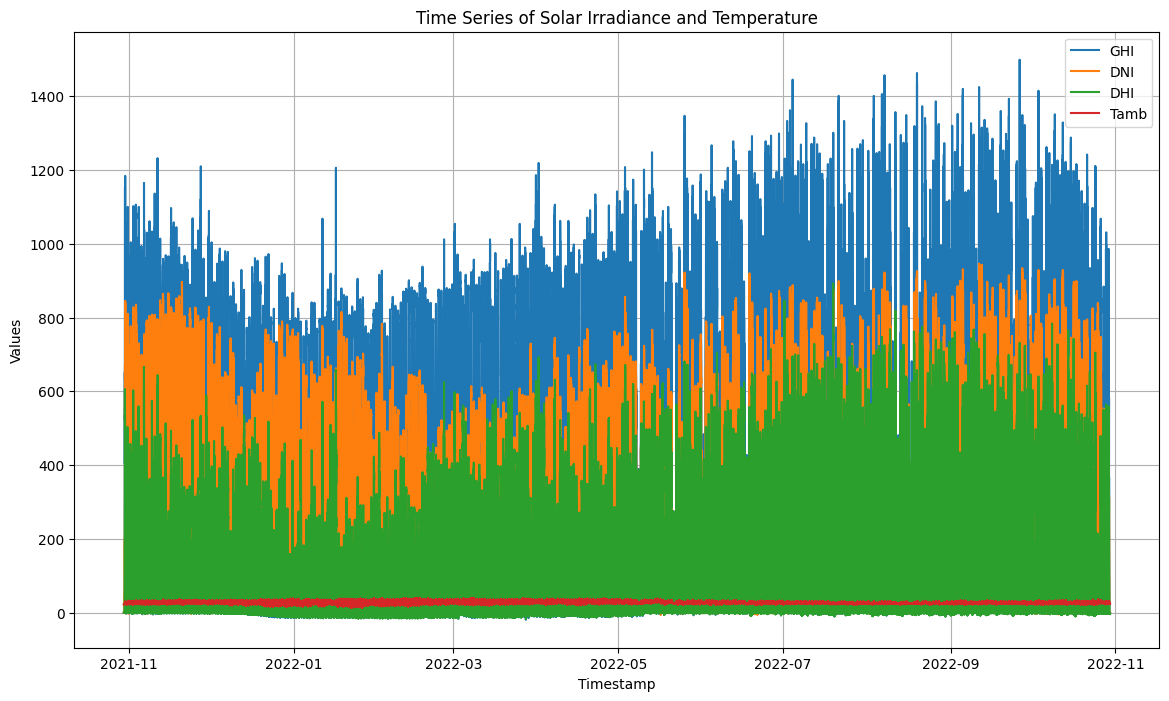

C:\Users\deres\AppData\Local\Temp\ipykernel_6768\1495431759.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()[['GHI', 'DNI', 'DHI', 'Tamb']]


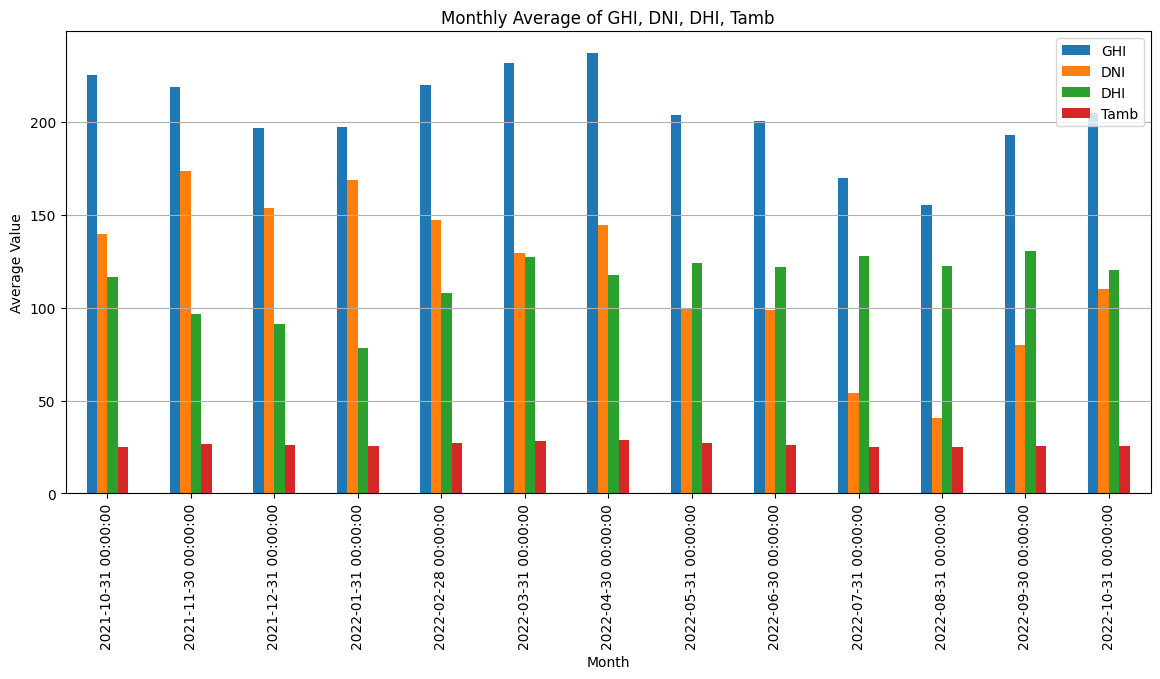

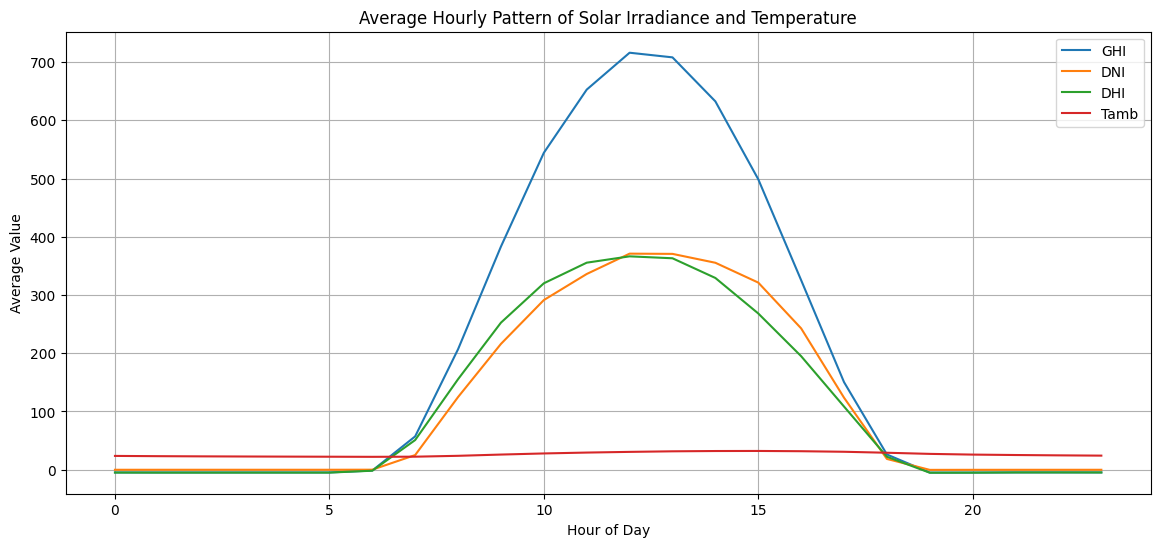

In [19]:
# Ensure timestamp column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for easier time-based plotting (optional)
df.set_index('Timestamp', inplace=True)

# 1. Plot line charts for GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['GHI'], label='GHI')
plt.plot(df.index, df['DNI'], label='DNI')
plt.plot(df.index, df['DHI'], label='DHI')
plt.plot(df.index, df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series of Solar Irradiance and Temperature')
plt.legend()
plt.grid(True)
plt.show()

# 2. Monthly patterns: average per month for each variable
monthly_avg = df.resample('M').mean()[['GHI', 'DNI', 'DHI', 'Tamb']]

monthly_avg.plot(kind='bar', figsize=(14, 6))
plt.title('Monthly Average of GHI, DNI, DHI, Tamb')
plt.ylabel('Average Value')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

# 3. Daily trends: average per hour of day (assuming data covers multiple days)
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(14,6))
plt.title('Average Hourly Pattern of Solar Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()


   Cleaning        ModA        ModB
0         0  206.578599  198.038150
1         1  273.309252  277.231102


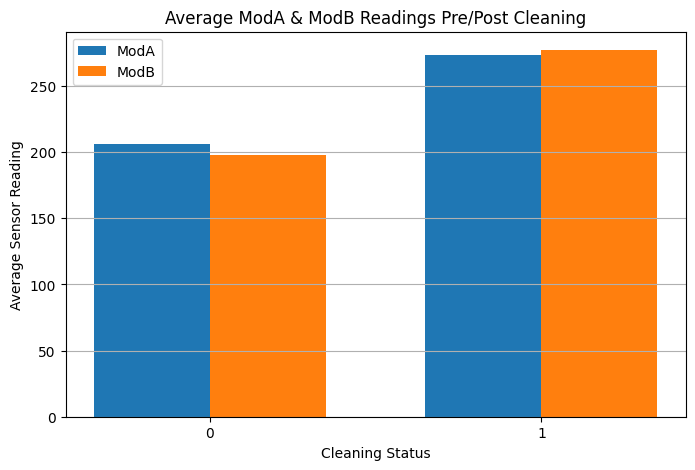

In [20]:
# Group by the 'Cleaning' flag and calculate mean of ModA and ModB
grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

print(grouped)  # Optional: see the mean values

# Plotting the averages pre/post cleaning
plt.figure(figsize=(8,5))
bar_width = 0.35
index = np.arange(len(grouped))

plt.bar(index, grouped['ModA'], bar_width, label='ModA')
plt.bar(index + bar_width, grouped['ModB'], bar_width, label='ModB')

plt.xlabel('Cleaning Status')
plt.ylabel('Average Sensor Reading')
plt.title('Average ModA & ModB Readings Pre/Post Cleaning')
plt.xticks(index + bar_width / 2, grouped['Cleaning'])
plt.legend()
plt.grid(axis='y')
plt.show()


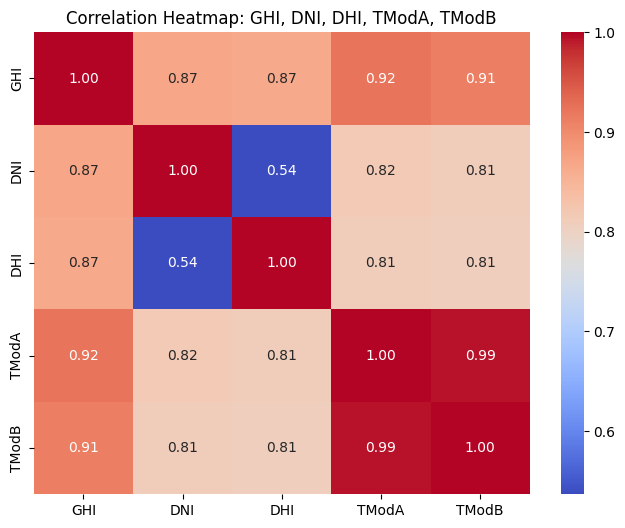

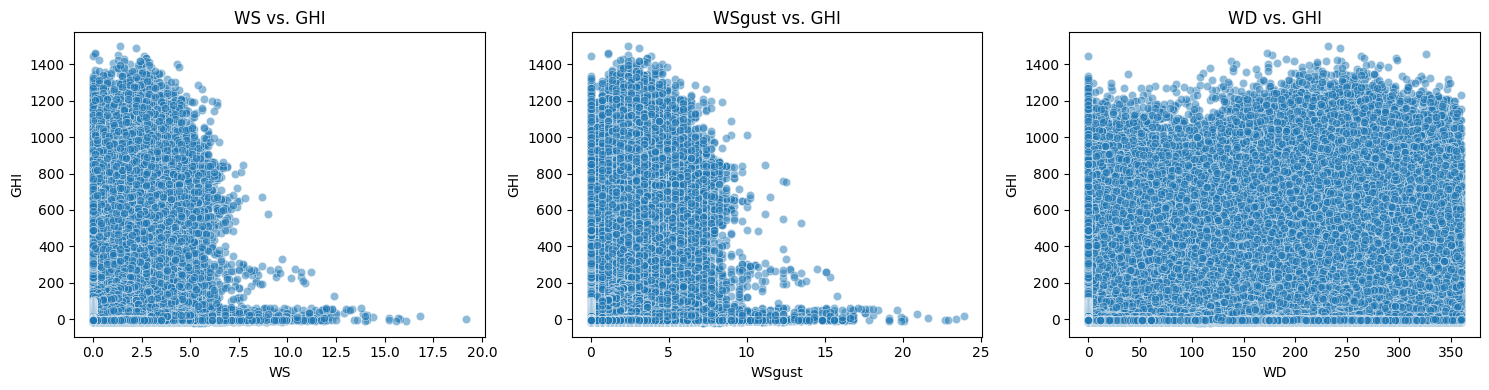

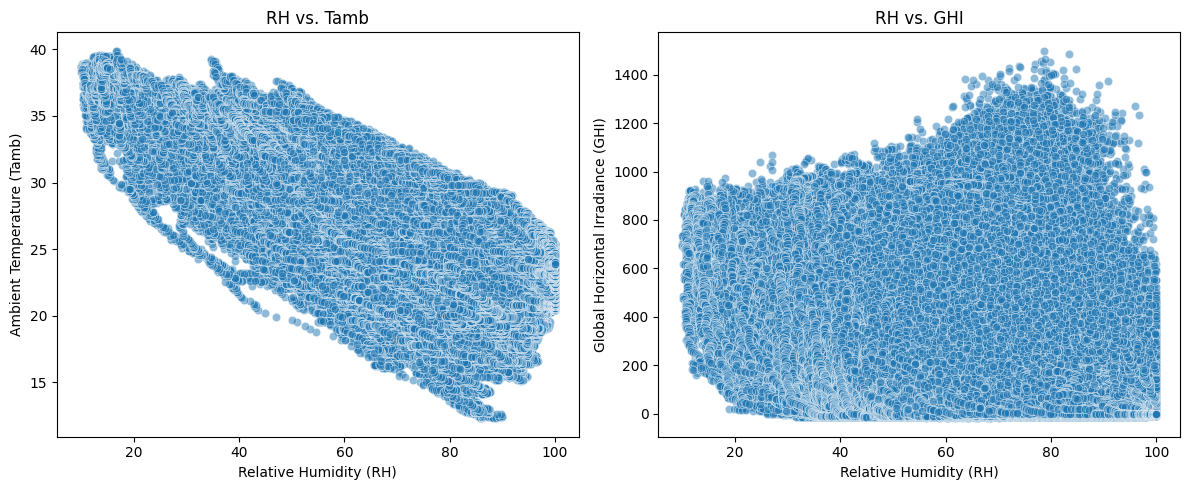

In [21]:
# 1. Correlation Heatmap for selected columns
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.show()

# 2. Scatter plots: WS, WSgust, WD vs. GHI
scatter_cols = ['WS', 'WSgust', 'WD']

plt.figure(figsize=(15, 4))
for i, col in enumerate(scatter_cols, 1):
    plt.subplot(1, len(scatter_cols), i)
    sns.scatterplot(data=df, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')
    plt.xlabel(col)
    plt.ylabel('GHI')
plt.tight_layout()
plt.show()

# 3. Scatter plots: RH vs. Tamb and RH vs. GHI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5)
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Global Horizontal Irradiance (GHI)')

plt.tight_layout()
plt.show()


C:\Users\deres\AppData\Local\Temp\ipykernel_6768\1650019008.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rose_data = df.groupby('WD_bin')['WS'].mean().reindex(wd_labels)


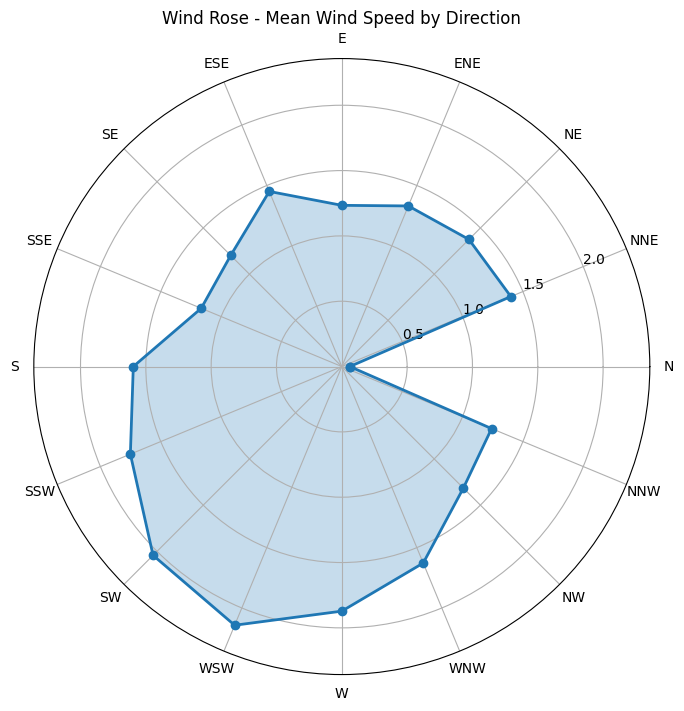

In [25]:
# Map WD==360 to 0 (360 == 0 degrees)
df['WD_fixed'] = df['WD'].apply(lambda x: 0 if x == 360 else x)

# Define bins and labels correctly
wd_bins = np.arange(-11.25, 360, 22.5)  # 17 edges → 16 intervals
wd_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
             'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']  # 16 labels

df['WD_bin'] = pd.cut(df['WD_fixed'], bins=wd_bins, labels=wd_labels, right=False, include_lowest=True)

# Fill NaNs with 'N' (without adding categories)
df['WD_bin'] = df['WD_bin'].fillna('N')

# Group by direction bins, calculate mean wind speed
wind_rose_data = df.groupby('WD_bin')['WS'].mean().reindex(wd_labels)

# Plot
angles = np.linspace(0, 2 * np.pi, len(wd_labels), endpoint=False).tolist()
angles += angles[:1]  # Close the plot

values = wind_rose_data.tolist()
values += values[:1]  # Close the plot

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(wd_labels)
ax.set_title('Wind Rose - Mean Wind Speed by Direction')
ax.set_ylim(0, max(values) * 1.1)
plt.show()


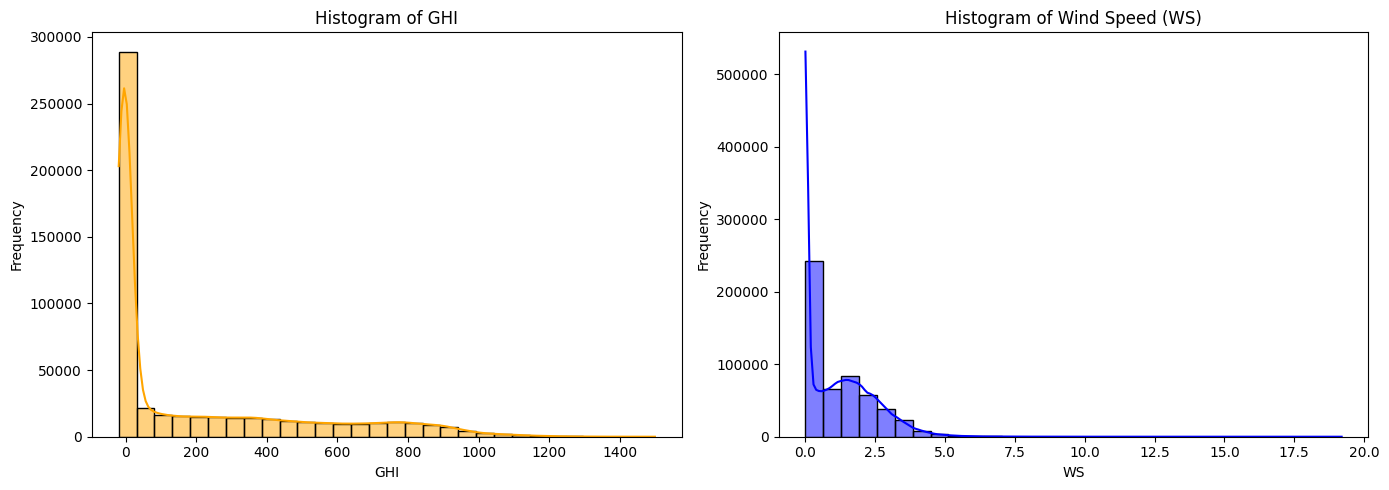

In [26]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=30, kde=True, color='blue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [27]:
df.to_csv('../data/sierraleone_final_clean.csv', index=False)
print("Final cleaned data saved!")


Final cleaned data saved!


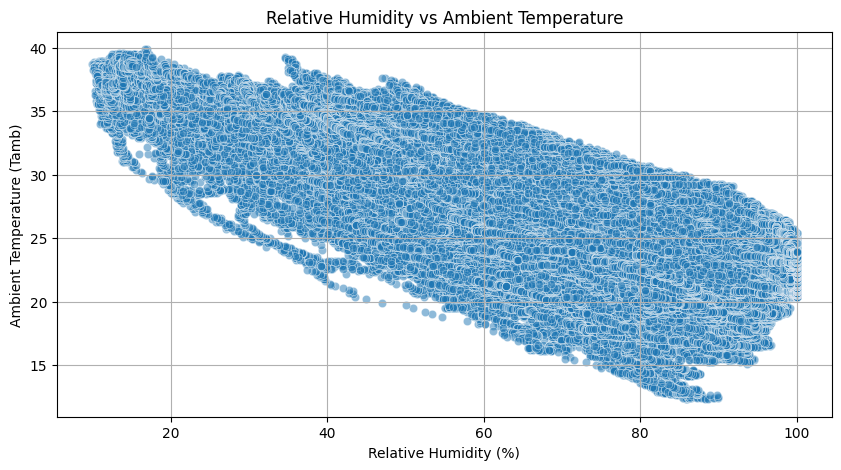

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.5)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.grid(True)
plt.show()


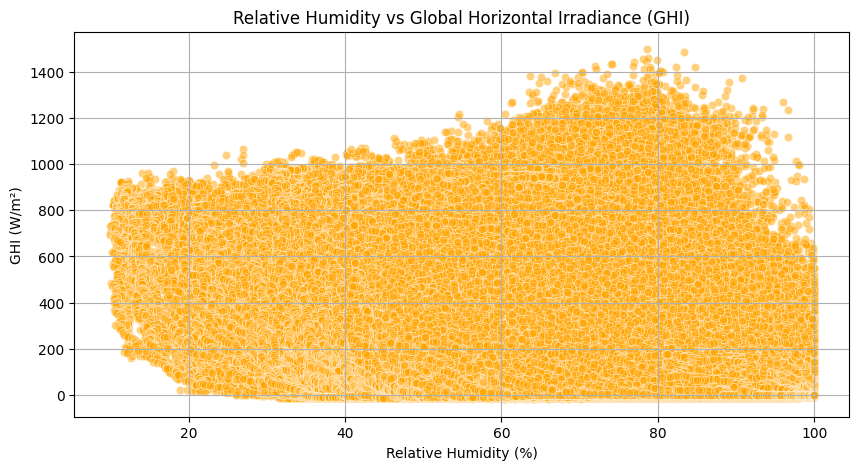

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5, color='orange')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


In [30]:
corr_subset = df[['RH', 'Tamb', 'GHI']].corr()
print("Correlation matrix:\n", corr_subset)


Correlation matrix:
             RH      Tamb       GHI
RH    1.000000 -0.791937 -0.546677
Tamb -0.791937  1.000000  0.641261
GHI  -0.546677  0.641261  1.000000


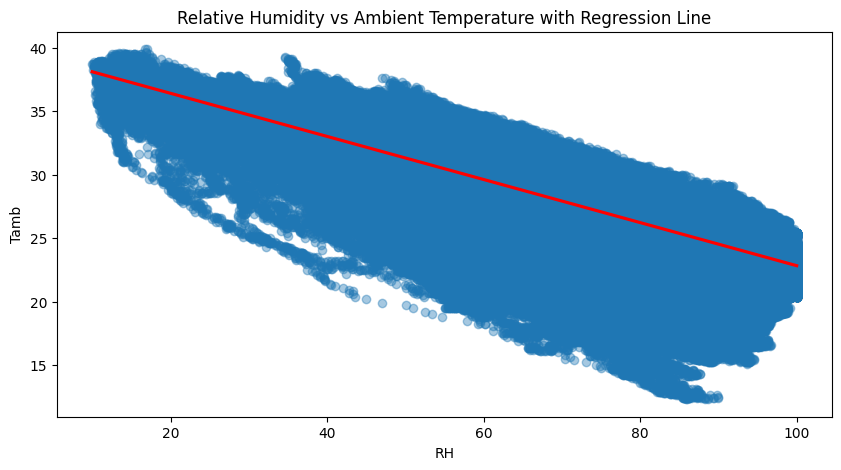

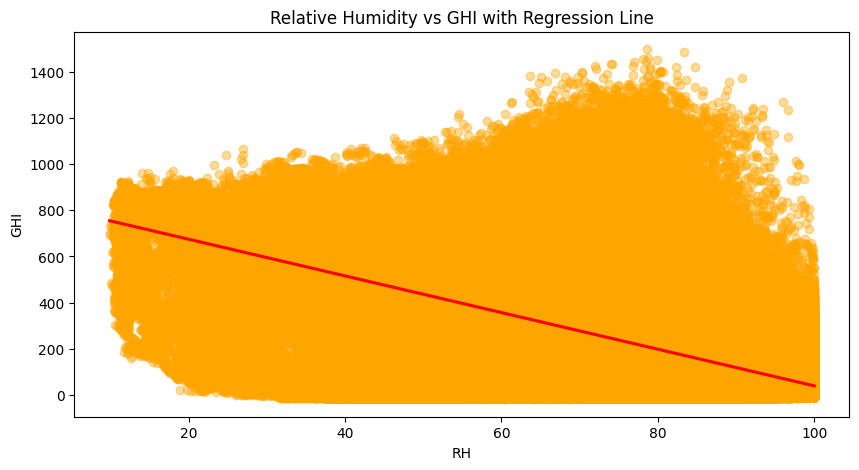

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relative Humidity vs Ambient Temperature with Regression Line')
plt.show()

plt.figure(figsize=(10,5))
sns.regplot(data=df, x='RH', y='GHI', scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, color='orange')
plt.title('Relative Humidity vs GHI with Regression Line')
plt.show()


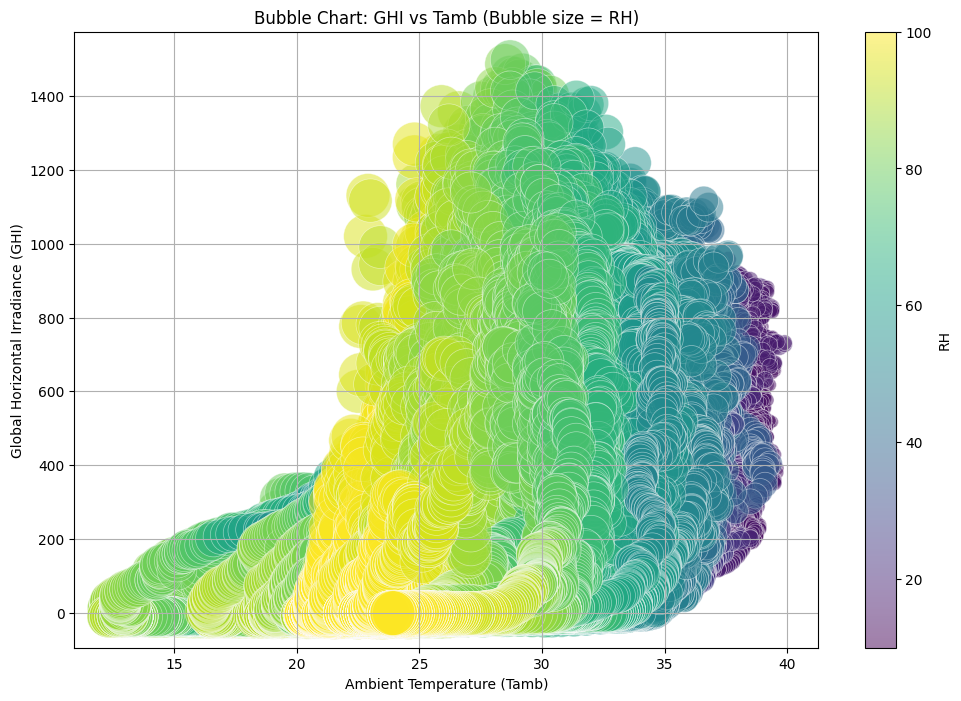

In [32]:
plt.figure(figsize=(12,8))

# Choose bubble size: either 'RH' or 'BP'
bubble_size_col = 'RH'  # or 'BP' if you have that column

# Normalize bubble sizes for better visualization
sizes = df[bubble_size_col]
sizes_norm = (sizes - sizes.min()) / (sizes.max() - sizes.min()) * 1000 + 50  # scale sizes

plt.scatter(df['Tamb'], df['GHI'], s=sizes_norm, alpha=0.5, c=df['RH'], cmap='viridis', edgecolors='w', linewidth=0.5)

plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title(f'Bubble Chart: GHI vs Tamb (Bubble size = {bubble_size_col})')
cbar = plt.colorbar()
cbar.set_label(bubble_size_col)

plt.grid(True)
plt.show()
